In [1]:
# import the required packages
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier,MLPRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn import svm
from sklearn.svm import SVC,SVR
from sklearn.metrics import mean_squared_error
%matplotlib inline

## 1. HR Analytics

### 1.1 Load and Sample the data

In [2]:
# load the dataset
df = pd.read_csv('hr_data_new.csv')
df_hr_new = df.copy()

In [3]:
df_hr_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   education             9336 non-null   int64  
 1   gender                9336 non-null   int64  
 2   no_of_trainings       9336 non-null   int64  
 3   age                   9336 non-null   int64  
 4   previous_year_rating  9336 non-null   float64
 5   length_of_service     9336 non-null   int64  
 6   KPIs_met >80%         9336 non-null   int64  
 7   awards_won?           9336 non-null   int64  
 8   avg_training_score    9336 non-null   int64  
 9   is_promoted           9336 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 729.5 KB


In [4]:
df_hr_new.head()

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,0,1,35,5.0,3,1,0,50,1
1,1,1,1,33,5.0,6,1,0,51,1
2,0,1,1,50,4.0,17,1,0,47,1
3,1,1,1,27,3.0,1,1,1,58,1
4,1,1,1,27,3.0,1,0,0,61,1


In [5]:
cols_to_scale=["age","length_of_service","avg_training_score","previous_year_rating"]
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df_hr_new[cols_to_scale]=scaler.fit_transform(df_hr_new[cols_to_scale])

In [6]:
df_hr_new.head() # to see waht happen

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,0,1,0.375,1.00,0.060606,1,0,0.155172,1
1,1,1,1,0.325,1.00,0.151515,1,0,0.172414,1
2,0,1,1,0.750,0.75,0.484848,1,0,0.103448,1
3,1,1,1,0.175,0.50,0.000000,1,1,0.293103,1
4,1,1,1,0.175,0.50,0.000000,0,0,0.344828,1


### 1.2 Build the Model(s)

In [7]:
# Define Model Inputs (X) and Output (y)
X = df_hr_new.drop('is_promoted',axis=1)
y = df_hr_new["is_promoted"]

In [8]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### decsion tree

In [9]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 2)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

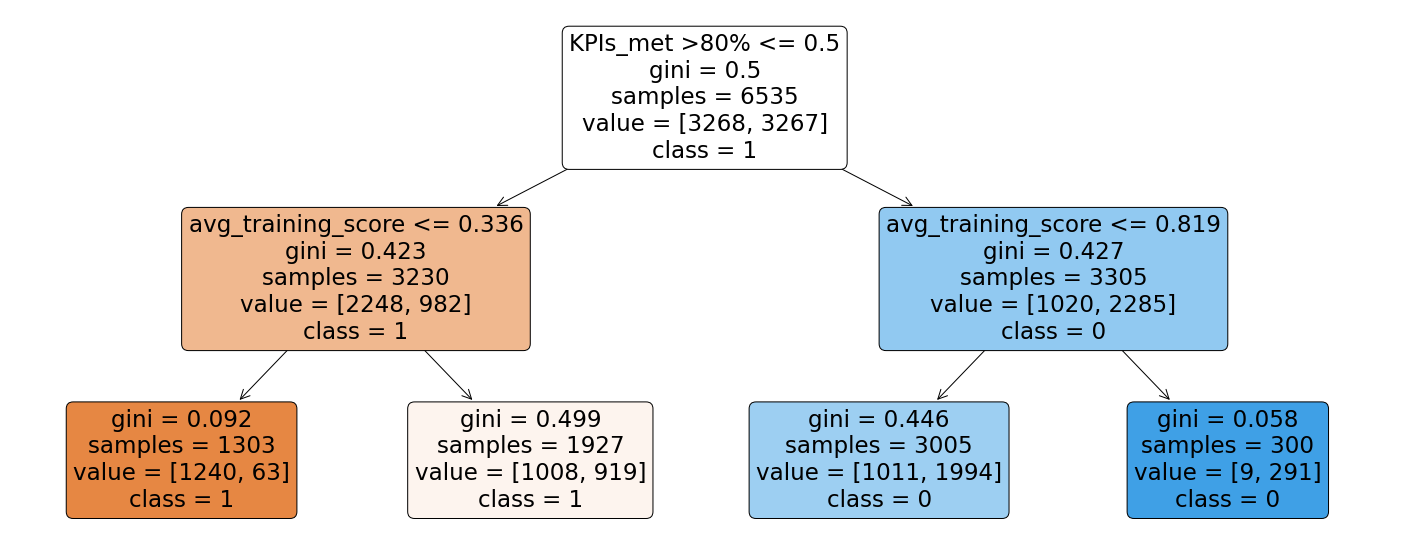

In [10]:
plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(df_hr_new.drop(['is_promoted'], axis=1)),
                class_names = ['1', '0'],
                rounded = True,
                filled= True)
plt.savefig('tree1.png',format='png')
plt.show()    

In [64]:
#training acc
train_acc = decision_tree.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.6936495791889824
the testing accuracy is:  0.682256337022492


### ANN model

In [85]:
# Create the ann model
mlp = MLPClassifier(activation ='logistic', hidden_layer_sizes=(10,), max_iter= 1000, solver = 'sgd', random_state=2)
# Fit the model to the training set
mlp.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=1000,
              random_state=2)

In [86]:
# print out the model coefficients and intercept
print(mlp.coefs_)
print(mlp.intercepts_)

[array([[-8.54017372e-02, -1.21364088e-03, -3.92034202e-02,
        -4.99746509e-01, -5.14379473e-01, -1.21926986e-01,
        -2.13593154e-02, -4.25971902e-01, -9.56794510e-02,
         1.85979664e-02],
       [ 1.63032688e-01, -1.77916863e-01, -2.74653152e-02,
        -5.80908039e-01, -5.13883009e-01,  1.41883463e-01,
        -9.33689005e-03, -6.21779837e-01,  1.92887806e-01,
        -5.33634739e-01],
       [-1.52433473e-01,  5.18780253e-02, -1.88776257e-01,
        -6.80634569e-01, -6.43557607e-01, -1.48235841e-01,
         3.42793235e-02, -6.87296754e-01, -2.32912900e-01,
        -1.51193608e-02],
       [-4.36445395e-01,  3.74210437e-01, -2.81754994e-01,
        -6.84239677e-01, -7.01962083e-01, -5.95411391e-01,
         5.38609971e-01, -6.36698870e-01, -7.01088544e-01,
         4.99908350e-01],
       [ 1.67369375e+00, -1.02564951e+00,  1.51374128e+00,
         7.66246024e-01,  6.92810501e-01,  1.71607583e+00,
        -1.44920615e+00,  9.69134017e-01,  1.72499809e+00,
        -1

In [87]:
# calculated the training accuracy
print(mlp.score(X_train, y_train), '(Train Accuracy)')

0.7484315225707727 (Train Accuracy)


In [88]:
# calculated the testing accuracy
print(mlp.score(X_test, y_test), '(Test Accuracy)')

0.7368796858264905 (Test Accuracy)


### svm

In [38]:
svm = SVC(gamma=0.1, kernel='linear',C=1)
svm.fit(X_train,y_train)

print('training accuracy is: ', svm.score(X_train,y_train))
print('testing accuracy is: ', svm.score(X_test,y_test))

training accuracy is:  0.7166029074215762
testing accuracy is:  0.70581935023206


### 1.3 Evaluate and Improve the Model(s)

### improve on decision tree

In [77]:
# Use GridSearch to find the best combination of model hyperparameters

dt = tree.DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) # 

print(gs.best_score_)
print(gs.best_params_)

0.7657169216647699
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 16}


In [78]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 7, 
                                            min_samples_leaf = 1, min_samples_split =10, random_state=1)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=10,
                       random_state=1)

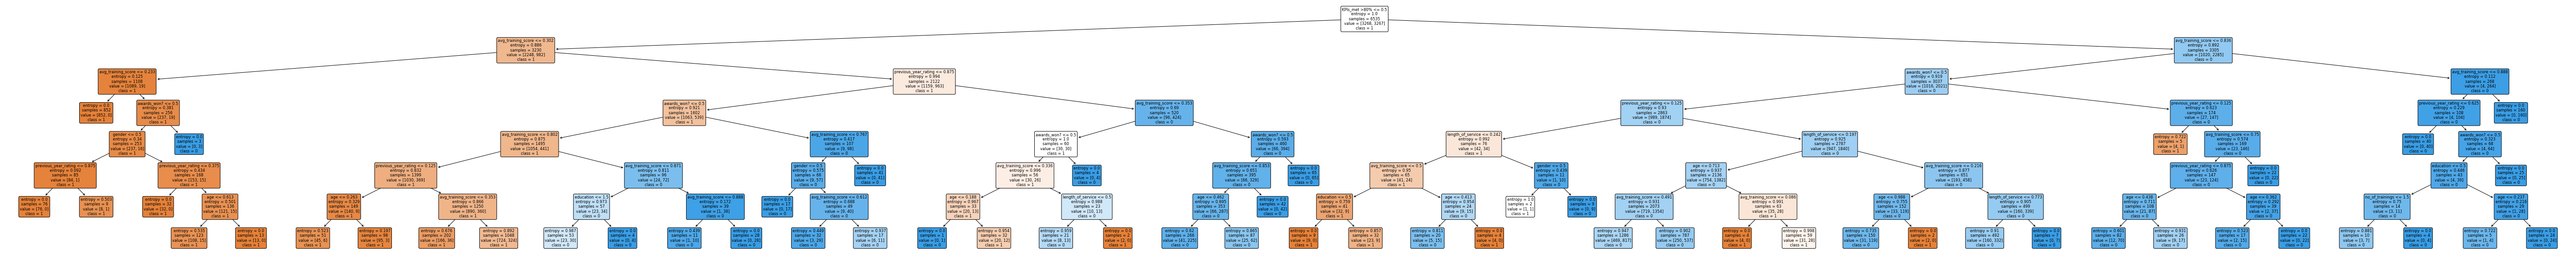

In [79]:
plt.figure(figsize=(100,10))
tree.plot_tree(decision_tree,
              feature_names = list(df_hr_new.drop(['is_promoted'], axis=1)),
                class_names = ['1', '0'],
                rounded = True,
                filled= True)
#plt.savefig('tree2(improved).png',format='png')
plt.show()    

In [80]:
#training acc
train_acc = decision_tree.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.7727620504973222
the testing accuracy is:  0.7597286683327383


### improve on ann

In [91]:
param_grid = {"activation" : ['logistic', 'relu'], 
              "hidden_layer_sizes" : [(20,), (40,), (80,)], 
              "max_iter" : [2000, 4000, 8000], 
              "solver" : ['sgd','adam']}

gs = GridSearchCV(mlp, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) # 

print(gs.best_score_)
print(gs.best_params_)

0.7533208292941072
{'activation': 'relu', 'hidden_layer_sizes': (20,), 'max_iter': 2000, 'solver': 'adam'}


In [82]:
# Create the ann model
mlp2 = MLPClassifier(activation ='relu', hidden_layer_sizes=(20,), max_iter= 2000, solver = 'adam', random_state=2)
# Fit the model to the training set
mlp2.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(20,), max_iter=2000, random_state=2)

In [83]:
# calculated the training accuracy
print(mlp2.score(X_train, y_train), '(Train Accuracy)')
# calculated the testing accuracy
print(mlp2.score(X_test, y_test), '(Test Accuracy)')

0.7499617444529457 (Train Accuracy)
0.7422349161013924 (Test Accuracy)


### improve on SVM

In [39]:


param_grid_svm = {'gamma':[0.1,1,10],
              'C':[1,10,20],
              'kernel':['rbf','linear']}

gs = GridSearchCV(svm, param_grid=param_grid_svm, scoring='accuracy', cv= 5, n_jobs=-1)
gs = gs.fit(X_train, y_train) 

print(gs.best_score_)
print(gs.best_params_)

0.7504208110175975
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [40]:
svm = SVC(gamma=1, kernel='rbf',C=1)
svm.fit(X_train,y_train)

print('training accuracy is: ', svm.score(X_train,y_train))
print('testing accuracy is: ', svm.score(X_test,y_test))

training accuracy is:  0.7609793420045907
testing accuracy is:  0.7375937165298108


since all 3 models are neither overfitting or underfitting, decision tree is the most suitable model as it has highest accuracy 

## 2. Airbnb

### 2.1 Load and Sample the data

In [2]:
df = pd.read_csv('listings_new.csv')
df_ab_new = df.copy()

In [3]:
df_ab_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7536 entries, 0 to 7535
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             7536 non-null   int64  
 1   latitude                        7536 non-null   float64
 2   longitude                       7536 non-null   float64
 3   room_type                       7536 non-null   int64  
 4   price                           7536 non-null   int64  
 5   minimum_nights                  7536 non-null   int64  
 6   number_of_reviews               7536 non-null   int64  
 7   reviews_per_month               7536 non-null   float64
 8   calculated_host_listings_count  7536 non-null   int64  
 9   availability_365                7536 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 588.9 KB


In [4]:
df_ab_new.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,1.44255,103.79580,0,83,180,1,0.01,2,365
1,0,1.33235,103.78521,0,81,90,18,0.28,1,365
2,1,1.44246,103.79667,0,69,6,20,0.20,2,365
3,1,1.34541,103.95712,0,206,1,14,0.15,9,353
4,1,1.34567,103.95963,0,94,1,22,0.22,9,355


In [5]:
cols_to_scale=["latitude","longitude","minimum_nights","number_of_reviews","calculated_host_listings_count"
               ,"availability_365","reviews_per_month"]
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df_ab_new[cols_to_scale]=scaler.fit_transform(df_ab_new[cols_to_scale])

In [6]:
df_ab_new.head(20)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,0.942483,0.423218,0,83,0.498607,0.003096,0.000000,0.003663,1.000000
1,0,0.416042,0.388829,0,81,0.247911,0.055728,0.020785,0.000000,1.000000
2,1,0.942053,0.426043,0,69,0.013928,0.061920,0.014627,0.003663,1.000000
3,1,0.478431,0.947069,0,206,0.000000,0.043344,0.010778,0.029304,0.967123
4,1,0.479673,0.955220,0,94,0.000000,0.068111,0.016166,0.029304,0.972603
5,1,0.486122,0.959766,0,104,0.000000,0.120743,0.028483,0.029304,0.947945
6,1,0.469211,0.967365,0,208,0.000000,0.077399,0.018476,0.029304,0.471233
7,1,0.371566,0.805845,0,50,0.247911,0.538700,0.143957,0.010989,0.161644
8,1,0.378923,0.799351,0,54,0.247911,0.613003,0.159353,0.010989,0.364384
9,1,0.379067,0.800260,0,42,0.247911,0.730650,0.193995,0.010989,0.402740


### 2.2 Build the Model(s)

In [7]:
# Define Model Inputs (X) and Output (y)
X = df_ab_new.drop('price',axis=1)
y = df_ab_new["price"]

In [8]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

SVM model

In [9]:

svr = svm.SVR( gamma=0.001, C=0.1)
svr.fit(X_train,y_train)

print('training mean squared error: ', mean_squared_error(svr.predict(X_train), y_train))
print('testing mean squared error: ', mean_squared_error(svr.predict(X_test), y_test))

training mean squared error:  7498.580581933148
testing mean squared error:  7627.860485452948


In [11]:
from sklearn.model_selection import cross_val_score, cross_validate
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(svr, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score = True)

print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))
print(svr.score(X_train, y_train),'(Train R^2 Value)')
print(svr.score(X_test, y_test),'(Test R^2 Value)')

cross val training mean_squared_error is: 7539.832049833873
cross val testing mean_squared_error is: 7798.623388541577
-0.03467948457025627 (Train R^2 Value)
-0.04450430568389785 (Test R^2 Value)


Random Forest

In [24]:
from sklearn. ensemble import RandomForestRegressor
# Create Random Forest Model
rf_reg = RandomForestRegressor(max_depth=2, random_state=1, n_estimators=20)

rf_reg.fit(X_train, y_train)

print('the training mean squared error is: ', mean_squared_error(rf_reg.predict(X_train), y_train))
print('the testing mean squared error is: ', mean_squared_error(rf_reg.predict(X_test), y_test))

the training mean squared error is:  4240.576031993731
the testing mean squared error is:  4324.771302846777


k-fold

In [25]:

# Evaluate the Model using K-folds Cross validation
results  = cross_validate(rf_reg, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score = True)

print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

print(rf_reg.score(X_train, y_train), '(Train R^2 Value)')
print(rf_reg.score(X_test, y_test), '(Test R^2 Value)')

cross val training mean_squared_error is: 4273.316157549833
cross val testing mean_squared_error is: 4326.776644286622
0.4148709912332348 (Train R^2 Value)
0.40779694967724844 (Test R^2 Value)


### ANN model

In [26]:
# Create the ann model
mlp_reg = MLPRegressor(activation ='logistic', hidden_layer_sizes=(10,), max_iter= 1000, solver = 'sgd', random_state=2)
# Fit the model to the training set
mlp_reg.fit(X_train,y_train)

MLPRegressor(activation='logistic', hidden_layer_sizes=(10,), max_iter=1000,
             random_state=2, solver='sgd')

In [27]:
# calculated the training accuracy
print(mlp_reg.score(X_train, y_train), '(Train R^2 Value)')
# calculated the testing accuracy
print(mlp_reg.score(X_test, y_test), '(Test R^2 Value)')

0.46116097416371227 (Train R^2 Value)
0.4385768712169259 (Test R^2 Value)


### 2.3 Evaluate and Improve the Model(s)

In [14]:

model_params={
    'svm':{
        'model':svm.SVR(),
        'params':{
            'gamma':[0.1,1,10],
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model': RandomForestRegressor(),
        'params':{
            'n_estimators':[10,20,40],
            'max_depth':[1,5,10]
        }
    },
    'ann_model':{
        'model':MLPRegressor(),
        'params':{
            'activation':['logistic', 'relu'],
            "hidden_layer_sizes" : [(20,), (40,), (80,)], 
            "max_iter" : [200, 1000, 4000], 
            "solver" : ['sgd','adam']
        }
        
    }
    
}



In [15]:
scores=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimiz

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer

In [16]:
pd.set_option('display.max_colwidth', 0)


In [17]:
df_score=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,svm,0.499156,"{'C': 20, 'gamma': 10, 'kernel': 'rbf'}"
1,random_forest,0.618042,"{'max_depth': 10, 'n_estimators': 40}"
2,ann_model,0.501645,"{'activation': 'logistic', 'hidden_layer_sizes': (80,), 'max_iter': 1000, 'solver': 'sgd'}"


In [18]:
df_score.loc[:,"best_params"]

0    {'C': 20, 'gamma': 10, 'kernel': 'rbf'}                                                   
1    {'max_depth': 10, 'n_estimators': 40}                                                     
2    {'activation': 'logistic', 'hidden_layer_sizes': (80,), 'max_iter': 1000, 'solver': 'sgd'}
Name: best_params, dtype: object

In [12]:
svr = svm.SVR(kernel='rbf', gamma=10, C=20)
svr.fit(X_train,y_train)

print('training mean squared error: ', mean_squared_error(svr.predict(X_train), y_train))
print('testing mean squared error: ', mean_squared_error(svr.predict(X_test), y_test))
print(svr.score(X_train, y_train),'(Train R^2 Value)')
print(svr.score(X_test, y_test),'(Test R^2 Value)')

training mean squared error:  3325.285972482128
testing mean squared error:  3654.879991070769
0.5411658061865467 (Train R^2 Value)
0.4995270436957059 (Test R^2 Value)


In [28]:
# Create Random Forest Model
rf_reg = RandomForestRegressor(max_depth=10, random_state=1, n_estimators=40)

rf_reg.fit(X_train, y_train)

print('the training mean squared error is: ', mean_squared_error(rf_reg.predict(X_train), y_train))
print('the testing mean squared error is: ', mean_squared_error(rf_reg.predict(X_test), y_test))
print(rf_reg.score(X_train, y_train), '(Train R^2 Value)')
print(rf_reg.score(X_test, y_test), '(Test R^2 Value)')

the training mean squared error is:  1569.2499977940686
the testing mean squared error is:  2871.5023800469467
0.7834695831913221 (Train R^2 Value)
0.6067971346014339 (Test R^2 Value)


In [29]:
# Create the ann model
mlp_reg = MLPRegressor(activation ='relu', hidden_layer_sizes=(80,), max_iter= 1000, solver = 'sgd', random_state=2)
# Fit the model to the training set
mlp_reg.fit(X_train,y_train)
# calculated the training accuracy
print(mlp_reg.score(X_train, y_train), '(Train R^2 Value))')
# calculated the testing accuracy
print(mlp_reg.score(X_test, y_test), '(Test R^2 Value))')

0.48405359843416185 (Train R^2 Value))
0.45666696973688403 (Test R^2 Value))


ANN model is the final model as it is least overfitted